In [88]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [89]:
# 生成[0,1)的浮点数 20行2列
random_data = np.random.random((30,2)) 

In [90]:
random_data

array([[0.12479865, 0.39043986],
       [0.68725913, 0.08078786],
       [0.35385422, 0.85168677],
       [0.31701611, 0.89041988],
       [0.81093089, 0.63013257],
       [0.3214928 , 0.15891833],
       [0.78172086, 0.13175257],
       [0.5304776 , 0.68226268],
       [0.07326039, 0.10491344],
       [0.62267289, 0.68050821],
       [0.98007681, 0.72514126],
       [0.49551862, 0.58327423],
       [0.72971113, 0.35760692],
       [0.18685067, 0.65201457],
       [0.2804007 , 0.24464065],
       [0.06364984, 0.81836315],
       [0.60268548, 0.10087049],
       [0.87348255, 0.02112855],
       [0.84540412, 0.89464931],
       [0.97770558, 0.70235835],
       [0.17534482, 0.25958481],
       [0.3831914 , 0.74305705],
       [0.51005351, 0.00203311],
       [0.32281438, 0.10495062],
       [0.56375309, 0.33998435],
       [0.64054554, 0.70903666],
       [0.38530156, 0.99221055],
       [0.29824731, 0.9408813 ],
       [0.07165223, 0.23611424],
       [0.42255306, 0.64333354]])

In [93]:
X_train = random_data[:,0]

In [94]:
X_test = random_data[:,1]

### 线性回归

In [95]:
def assuming_function(x):
    # 在我们的日常生活中是常见的
    # 体重 -> 高血压的概率
    # 收入 -> 买阿玛尼的概率
    # 其实都是一种潜在的函数关系 + 一个随机变化
    return 13.4 * x + 5 + np.random.randint(-5, 5)    

In [96]:
y = [assuming_function(x) for x in X]

Text(0,0.5,'买阿玛尼的概率')

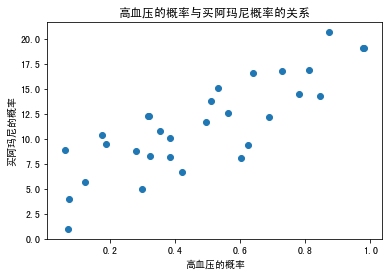

In [98]:
plt.scatter(X,y)
plt.title("高血压的概率与买阿玛尼概率的关系")
plt.xlabel("高血压的概率")
plt.ylabel("买阿玛尼的概率")

In [99]:
y = np.array(y)

In [100]:
from sklearn.linear_model import LinearRegression

In [109]:
reg = LinearRegression().fit(X_train.reshape(-1,1),y)

In [111]:
reg.score(X_train.reshape(-1,1),y)

0.6902116839222776

In [113]:
# 打印模型的系数k
reg.coef_

array([14.38977235])

In [115]:
# 打印模型偏差 b
reg.intercept_

4.49050612619949

In [116]:
def predict_function(x):
    return reg.coef_ * x + reg.intercept_

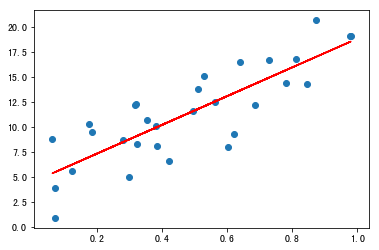

In [120]:
plt.scatter(X_train, y)
plt.plot(X_train,predict_function(X_train), color='red')

In [122]:
# 使用新数据X_test 预测
y_test = predict_function(X_test)

In [123]:
y_test

array([10.10884678,  5.65302501, 16.74608484, 17.30344548, 13.55797032,
        6.77730477,  6.38639555, 14.30811081,  6.00018661, 14.2828644 ,
       14.92512382, 12.88368949,  9.63638836, 13.87284738,  8.01082939,
       16.2665656 ,  5.94200947,  4.7945411 , 17.3643061 , 14.59728283,
        8.2258725 , 15.18292795,  4.51976211,  6.0007217 ,  9.3828035 ,
       14.69338222, 18.76819009, 18.02957387,  7.88813635, 13.74792928])

### KNN

In [125]:
from scipy.spatial.distance import cosine

In [127]:
def get_data(x,y):
    return [(xi,yi) for xi , yi in zip(x,y)]

In [128]:
def get_distance(x1,x2):
    return cosine(x1,x2)

In [132]:
def knn_predict(x,k=5):
    most_k_similars = sorted(get_data(X_train,y),key = lambda xi : get_distance(xi[0],x))[:k]
    sum_k = 0
    for t in most_k_similars:  # 求均值
        sum_k += t[1]
    return sum_k / k

In [134]:
knn_predict(0.53245)

11.547542117610362

In [136]:
knn_predict(0.888)

12.422349696749073

In [137]:
knn_predict(0.2134234)

9.960968293887248

### Decision Tree

In [192]:
from collections import Counter
import pandas as pd

In [193]:
Counter([1,1,1,1,2,2,3,3,3])

Counter({1: 4, 2: 2, 3: 3})

In [194]:
def entropy(elements):
    counter = Counter(elements)
    probs = [counter[c] / len(elements) for c in set(elements)]
    return - sum(p * np.log(p) for p in probs)

In [195]:
entropy([1,1,1,1,2,2,3,3,3])

1.0608569471580214

In [196]:
entropy([1,1,1,2,3,4,5,5,5])

1.464816384890813

In [168]:
mock_data = {
    'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}

In [171]:
datasets = pd.DataFrame.from_dict(mock_data)

In [216]:
datasets

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
2,F,+10,2,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0
6,M,-10,2,1


In [221]:
def find_min_spliter(traing_data:pd.DataFrame,target:str) :
    x_fields = set(traing_data.columns.tolist()) - {target}
    
    spliter = None
    min_entropy = float("inf")
    
    for x in x_fields:
        values = set(traing_data[x])
        for v in values:
            sub_spliter_1 = traing_data[traing_data[x] == v][target].tolist()
            entroy_1 = entropy(sub_spliter_1)
            sub_spilter_2 = traing_data[traing_data[x] != v][target].tolist()
            entroy_2 = entropy(sub_spilter_2)
            
            entropy_v = entroy_1 + entroy_2
            print("{}混乱度为:{}".format(x,entropy_v))
            
            if entropy_v <= min_entropy:
                min_entropy = entropy_v
                spliter = (x,v)
    
    print("spliter is:{}".format(spliter))
    print("the min entropy is:{}".format(min_entropy))
    
    return spliter

In [222]:
find_min_spliter(datasets,"bought")

gender混乱度为:1.198849312913621
gender混乱度为:1.198849312913621
income混乱度为:0.6730116670092565
income混乱度为:0.6730116670092565
family_number混乱度为:0.6730116670092565
family_number混乱度为:0.6730116670092565
spliter is:('family_number', 2)
the min entropy is:0.6730116670092565


('family_number', 2)

In [223]:
datasets[datasets['family_number'] == 2]

,gender,income,family_number,bought
2,F,+10,2,1
6,M,-10,2,1


In [224]:
datasets[datasets['family_number'] == 1]

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0


In [226]:
find_min_spliter(datasets[datasets['family_number'] == 1], 'bought')

gender混乱度为:0.6365141682948128
gender混乱度为:0.6365141682948128
income混乱度为:0.5623351446188083
income混乱度为:0.5623351446188083
family_number混乱度为:0.6730116670092565
spliter is:('income', '-10')
the min entropy is:0.5623351446188083


('income', '-10')

In [229]:
sub_df = datasets[datasets['family_number'] == 1]

In [232]:
sub_df[sub_df['income'] == '+10']

,gender,income,family_number,bought
0,F,+10,1,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0


In [233]:
sub_df[sub_df['income'] != '+10']

,gender,income,family_number,bought
1,F,-10,1,1


In [234]:
find_min_spliter(sub_df[sub_df['income'] == '+10'],"bought")

gender混乱度为:0.6931471805599453
gender混乱度为:0.6931471805599453
income混乱度为:0.5623351446188083
family_number混乱度为:0.5623351446188083
spliter is:('family_number', 1)
the min entropy is:0.5623351446188083


('family_number', 1)

### k-means

In [275]:
from sklearn.cluster import KMeans

In [276]:
X = [np.random.randint(0,100) for _ in range(100)]
y = [np.random.randint(0,100) for _ in range(100)]

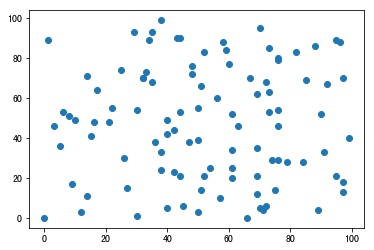

In [277]:
plt.scatter(X,y)

In [278]:
train_data = [[x,y] for x,y in zip(X,y)]

In [279]:
train_data

[[92, 67],
 [76, 46],
 [30, 1],
 [61, 52],
 [44, 90],
 [82, 83],
 [67, 70],
 [51, 14],
 [48, 72],
 [97, 13],
 [84, 28],
 [63, 46],
 [79, 28],
 [75, 14],
 [76, 29],
 [40, 5],
 [40, 42],
 [56, 60],
 [30, 54],
 [40, 49],
 [54, 25],
 [52, 83],
 [38, 24],
 [71, 4],
 [60, 77],
 [50, 39],
 [15, 41],
 [74, 29],
 [35, 93],
 [14, 71],
 [88, 86],
 [76, 79],
 [10, 49],
 [25, 74],
 [91, 33],
 [69, 35],
 [29, 93],
 [73, 53],
 [90, 52],
 [61, 25],
 [97, 18],
 [76, 80],
 [99, 40],
 [48, 76],
 [69, 62],
 [5, 36],
 [26, 30],
 [0, 0],
 [35, 68],
 [27, 15],
 [38, 99],
 [85, 69],
 [33, 73],
 [66, 0],
 [96, 88],
 [44, 53],
 [8, 51],
 [61, 20],
 [72, 68],
 [52, 21],
 [22, 55],
 [3, 46],
 [1, 89],
 [17, 64],
 [50, 55],
 [50, 3],
 [47, 38],
 [89, 4],
 [95, 89],
 [42, 44],
 [45, 6],
 [43, 90],
 [76, 54],
 [73, 85],
 [14, 11],
 [44, 21],
 [34, 89],
 [70, 95],
 [38, 33],
 [51, 66],
 [97, 70],
 [69, 12],
 [32, 70],
 [70, 5],
 [6, 53],
 [9, 17],
 [57, 10],
 [61, 34],
 [95, 21],
 [69, 21],
 [32, 70],
 [59, 84],
 [73

In [280]:
cluster = KMeans(n_clusters=6,max_iter=800)

In [281]:
cluster.fit(train_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=800,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [282]:
cluster.cluster_centers_

array([[12.92307692, 54.23076923],
       [78.47368421, 17.63157895],
       [52.22222222, 40.83333333],
       [80.55555556, 72.94444444],
       [30.57142857, 12.35714286],
       [42.        , 80.83333333]])

In [283]:
cluster.labels_

array([3, 2, 4, 2, 5, 3, 3, 4, 5, 1, 1, 2, 1, 1, 1, 4, 2, 2, 0, 2, 2, 5,
       4, 1, 5, 2, 0, 1, 5, 0, 3, 3, 0, 5, 1, 2, 5, 3, 3, 2, 1, 3, 1, 5,
       3, 0, 4, 4, 5, 4, 5, 3, 5, 1, 3, 2, 0, 1, 3, 2, 0, 0, 0, 0, 2, 4,
       2, 1, 3, 2, 4, 5, 3, 3, 4, 4, 5, 3, 2, 5, 3, 1, 5, 1, 0, 4, 1, 2,
       1, 1, 5, 5, 3, 1, 0, 0, 5, 4, 2, 4], dtype=int32)

In [284]:
from collections import defaultdict

In [285]:
centers = defaultdict(list)

In [286]:
for label,location in zip(cluster.labels_,train_data):
    centers[label].append(location)

In [287]:
centers

defaultdict(list,
            {3: [[92, 67],
              [82, 83],
              [67, 70],
              [88, 86],
              [76, 79],
              [73, 53],
              [90, 52],
              [76, 80],
              [69, 62],
              [85, 69],
              [96, 88],
              [72, 68],
              [95, 89],
              [76, 54],
              [73, 85],
              [70, 95],
              [97, 70],
              [73, 63]],
             2: [[76, 46],
              [61, 52],
              [63, 46],
              [40, 42],
              [56, 60],
              [40, 49],
              [54, 25],
              [50, 39],
              [69, 35],
              [61, 25],
              [44, 53],
              [52, 21],
              [50, 55],
              [47, 38],
              [42, 44],
              [38, 33],
              [61, 34],
              [36, 38]],
             4: [[30, 1],
              [51, 14],
              [40, 5],
              [38, 24],
             

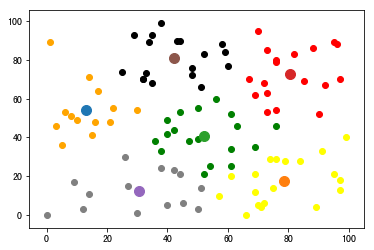

In [289]:
color = ['red', 'green', 'grey', 'black', 'yellow', 'orange']

for i , c in enumerate(centers):
    for location in centers[c]:
        plt.scatter(*location,c=color[i])  # 实参前面加上*表示拆包打散
        
for center in cluster.cluster_centers_:
    plt.scatter(*center,s=100)